In [86]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [68]:
original_df = pd.read_csv("Best_30_Years_monthly.csv", index_col=0)
# Difference data
df = original_df.diff()[1:]
df

,PRCP_US1UTWS0009,PRCP_USC00421285,PRCP_USC00421918,TMIN_USC00421918,TMAX_USC00421918,PRCP_USC00422294,TMIN_USC00422294,TMAX_USC00422294,PRCP_USC00422726,PRCP_USC00423335,...,TMAX_USC00429133,PRCP_USC00429560,TMIN_USC00429560,TMAX_USC00429560,PRCP_USW00024126,SNOW_USW00024126,SNWD_USW00024126,TMIN_USW00024126,TMAX_USW00024126,depth
1958-12,2.776344,-4.506452,-0.929032,-24.945161,-18.191398,-5.259140,0.638710,-13.737634,-17.472043,-9.051613,...,-8.016129,-9.546237,-0.462366,-4.094624,-5.116129,-6.412903,-19.613978,-5.240860,-23.318280,0.05
1959-01,6.064516,19.387097,-0.204301,-11.806452,-36.096774,6.870968,-25.451613,-30.419355,7.774194,2.525687,...,-32.838710,-0.580645,-29.483871,-36.096774,8.645161,7.290323,7.354839,-8.774194,-17.064516,0.20
1959-02,5.154378,-6.652074,24.904762,9.773041,6.247696,-1.216590,16.220046,-3.316820,10.135945,5.854497,...,-6.466590,4.622120,-15.458525,0.900922,-0.271889,4.072581,20.154378,13.548387,10.480415,0.25
1959-03,-9.476959,-8.122120,-23.248848,19.775346,51.494240,-1.622120,27.134793,50.897465,-11.587558,-5.541475,...,44.950461,-1.493088,57.877880,38.453917,-6.405530,-13.427419,-29.928571,12.290323,46.971198,0.20
1959-04,7.281720,3.960215,2.177419,37.523915,71.026696,0.926882,39.091398,72.676344,2.616129,0.046237,...,75.037634,15.864516,47.893548,89.836559,7.181720,0.777419,0.000000,47.176344,66.197849,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988-06,-21.174194,-31.704301,-9.017204,57.820430,81.926882,-6.053763,56.867742,85.951613,-19.518280,-11.875269,...,89.266667,-3.097849,56.725806,92.521505,-17.475269,-0.741935,0.000000,83.738710,95.924731,-0.35
1988-07,0.883871,1.639785,-4.724731,17.532184,30.990805,-3.075269,25.358065,34.854839,-0.707527,0.101075,...,34.346237,-2.708602,25.725806,26.059140,0.055914,0.000000,0.000000,24.906452,32.978495,-0.70
1988-08,4.258065,1.354839,3.258065,-21.159066,-13.659622,0.096774,-18.838710,-19.322581,4.000000,5.935484,...,-17.000000,1.387097,-39.548387,-20.967742,1.516129,0.000000,0.000000,-21.548387,-27.419355,-0.70
1988-09,-2.441935,-1.461290,0.666667,-51.839785,-64.697849,0.078495,-54.019355,-60.198925,-2.659140,-2.769892,...,-63.146237,1.854839,-48.444086,-64.458065,-1.205376,0.000000,0.000000,-65.058065,-76.825806,-0.50


In [49]:
df.isna().sum().sum()

0

In [50]:
# Split train and test
split_index = int(len(df) *.7)
train = df.iloc[:split_index]
test = df.iloc[split_index:]
test

,PRCP_US1UTWS0009,PRCP_USC00421285,PRCP_USC00421918,TMIN_USC00421918,TMAX_USC00421918,PRCP_USC00422294,TMIN_USC00422294,TMAX_USC00422294,PRCP_USC00422726,PRCP_USC00423335,...,TMAX_USC00429133,PRCP_USC00429560,TMIN_USC00429560,TMAX_USC00429560,PRCP_USW00024126,SNOW_USW00024126,SNWD_USW00024126,TMIN_USW00024126,TMAX_USW00024126,depth
1979-11,-0.651613,-0.875269,-12.656989,-69.886022,-135.188172,-3.286022,-84.977419,-147.932258,-8.163441,-12.865591,...,-136.586022,-8.374194,-94.408602,-143.601075,-2.313978,3.933333,4.200000,-87.829032,-136.319355,9.094947e-13
1979-12,-8.767742,-8.318280,-6.923656,-7.468817,-9.618280,-11.391398,-19.829032,-4.035484,-2.901075,-0.618280,...,10.263441,-2.432258,-2.172043,-9.044086,-3.750538,3.034409,12.187097,-23.493548,-17.454839,5.000000e-02
1980-01,27.193548,25.290323,109.612903,6.322581,-31.032258,31.419355,18.064516,-27.709677,18.387097,14.580645,...,-46.870968,13.903226,8.193548,-29.612903,18.967742,13.096774,17.193548,19.774194,-11.096774,1.500000e-01
1980-02,15.452765,14.697005,-40.215438,-25.958525,-4.444700,-7.697005,0.028802,26.323733,-0.097926,-9.843318,...,32.417051,-10.763825,10.502304,36.254608,-3.055300,-17.457373,33.597926,-4.294931,26.130184,5.250000e-01
1980-03,-31.355991,-10.190887,-46.945853,43.732719,43.638249,-4.786866,43.616359,26.224654,2.023399,7.778802,...,8.679724,0.150922,50.304147,24.680876,-0.235023,13.715438,-54.888249,37.746544,27.353687,6.750000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988-06,-21.174194,-31.704301,-9.017204,57.820430,81.926882,-6.053763,56.867742,85.951613,-19.518280,-11.875269,...,89.266667,-3.097849,56.725806,92.521505,-17.475269,-0.741935,0.000000,83.738710,95.924731,-3.500000e-01
1988-07,0.883871,1.639785,-4.724731,17.532184,30.990805,-3.075269,25.358065,34.854839,-0.707527,0.101075,...,34.346237,-2.708602,25.725806,26.059140,0.055914,0.000000,0.000000,24.906452,32.978495,-7.000000e-01
1988-08,4.258065,1.354839,3.258065,-21.159066,-13.659622,0.096774,-18.838710,-19.322581,4.000000,5.935484,...,-17.000000,1.387097,-39.548387,-20.967742,1.516129,0.000000,0.000000,-21.548387,-27.419355,-7.000000e-01
1988-09,-2.441935,-1.461290,0.666667,-51.839785,-64.697849,0.078495,-54.019355,-60.198925,-2.659140,-2.769892,...,-63.146237,1.854839,-48.444086,-64.458065,-1.205376,0.000000,0.000000,-65.058065,-76.825806,-5.000000e-01


In the next cells, I fit the model, remove columns with a high p-value, and repeat. I stopped removing columns when the BIC began to go up again. This happened to be at alpha = .05

In [51]:
train = sm.add_constant(train)
model = sm.OLS(train.depth, train.drop(columns='depth')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.533
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           7.98e-06
Time:                        16:35:10   Log-Likelihood:                -37.138
No. Observations:                 251   AIC:                             160.3
Df Residuals:                     208   BIC:                             311.9
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0090      0.019      0.462      0.645      -0.029       0.047
PRCP_US1UTWS0009     0.0024      0.005      0.481      0.631      -0.007       0.012
PRCP_USC00421285    -0.0024      0.003     -0.708      0.480      -0.009       0.004
PRCP_USC00421918    -0.0005      0.001     -0.865      0.388      -0.001       0.001
TMIN_USC00421918     0.0008      0.003      0.293      0.770      -0.004       0.006
TMAX_USC00421918    -0.0037      0.003     -1.180      0.239      -0.010       0.002
PRCP_USC00422294     0.0026      0.006      0.436      0.663      -0.009       0.015
TMIN_USC00422294     0.0055      0.003      1.640      0.102      -0.001       0.012
TMAX_USC00422294    -0.0066      0.004     -1.641      0.102      -0.015       0.001
PRCP_USC00422726     0.0014      0.004      0.316      0.752      -0.007       0.010
PRCP_USC00423335     0.0015      0.006      0.245      0.807      -0.011       0.014
TMIN_USC00424846    -0.0016      0.003     -0.599      0.550      -0.007       0.004
TMAX_USC00424846     0.0069      0.003      2.041      0.043       0.000       0.014
PRCP_USC00425705    -0.0017      0.004     -0.442      0.659      -0.009       0.006
TMIN_USC00425705    -0.0002      0.003     -0.060      0.952      -0.006       0.005
TMAX_USC00425705     0.0015      0.003      0.461      0.645      -0.005       0.008
PRCP_USC00427255    -0.0056      0.003     -1.624      0.106      -0.012       0.001
TMIN_USC00427255    -0.0026      0.003     -1.011      0.313      -0.008       0.002
TMAX_USC00427255    -0.0012      0.003     -0.429      0.669      -0.007       0.004
PRCP_USC00427576    -0.0019      0.005     -0.365      0.716      -0.012       0.008
TMIN_USC00427576     0.0046      0.002      1.835      0.068      -0.000       0.009
PRCP_USC00428114    -0.0022      0.003     -0.661      0.510      -0.009       0.004
TMIN_USC00428114    -0.0064      0.004     -1.640      0.103      -0.014       0.001
TMAX_USC00428114     0.0082      0.005      1.787      0.075      -0.001       0.017
PRCP_USC00428668     0.0002      0.003      0.064      0.949      -0.006       0.006
PRCP_USC00428741     0.0009      0.006      0.151      0.880      -0.010       0.012
SNOW_USC00428741     0.0011      0.006      0.193      0.848      -0.010       0.013
SNWD_USC00428741 -4.702e-05      0.001     -0.052      0.958      -0.002       0.002
TMIN_USC00428741     0.0010      0.004      0.270      0.788      -0.006       0.008
TMAX_USC00428741     0.0014      0.004      0.343      0.732      -0.007       0.010
TMIN_USC00428939     0.0014      0.003      0.478      0.633      -0.004       0.007
TMAX_USC00428939     0.0040      0.005      0.868      0.386      -0.005       0.013
PRCP_USC00429133    -0.0061      0.005     -1.268      0.206      -0.016       0.003
TMIN_USC00429133    -0.

In [52]:
dropped_cols = model.pvalues[model.pvalues > .5].index
dropped_cols

Index(['const', 'PRCP_US1UTWS0009', 'TMIN_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'TMIN_USC00424846',
       'PRCP_USC00425705', 'TMIN_USC00425705', 'TMAX_USC00425705',
       'TMAX_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428668', 'PRCP_USC00428741', 'SNOW_USC00428741',
       'SNWD_USC00428741', 'TMIN_USC00428741', 'TMAX_USC00428741',
       'TMIN_USC00428939', 'TMIN_USC00429133', 'PRCP_USC00429560',
       'PRCP_USW00024126', 'SNOW_USW00024126', 'SNWD_USW00024126',
       'TMAX_USW00024126'],
      dtype='object')

In [53]:
model = sm.OLS(train.depth, train.drop(columns='depth').drop(columns=dropped_cols)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  depth   R-squared (uncentered):                   0.321
Model:                            OLS   Adj. R-squared (uncentered):              0.271
Method:                 Least Squares   F-statistic:                              6.494
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    1.58e-12
Time:                        16:35:33   Log-Likelihood:                         -40.578
No. Observations:                 251   AIC:                                      115.2
Df Residuals:                     234   BIC:                                      175.1
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
PRCP_USC00421285     0.0006      0.002      0.276      0.783      -0.004       0.005
PRCP_USC00421918    -0.0003      0.000     -0.605      0.546      -0.001       0.001
TMAX_USC00421918    -0.0032      0.002     -1.361      0.175      -0.008       0.001
TMIN_USC00422294     0.0046      0.002      1.867      0.063      -0.000       0.010
TMAX_USC00422294    -0.0045      0.003     -1.460      0.146      -0.011       0.002
TMAX_USC00424846     0.0050      0.002      2.187      0.030       0.000       0.010
PRCP_USC00427255    -0.0055      0.002     -2.316      0.021      -0.010      -0.001
TMIN_USC00427255    -0.0032      0.002     -1.706      0.089      -0.007       0.000
TMIN_USC00427576     0.0053      0.002      2.408      0.017       0.001       0.010
TMIN_USC00428114    -0.0062      0.003     -2.154      0.032      -0.012      -0.001
TMAX_USC00428114     0.0097      0.004      2.540      0.012       0.002       0.017
TMAX_USC00428939     0.0050      0.004      1.356      0.176      -0.002       0.012
PRCP_USC00429133    -0.0041      0.003     -1.348      0.179      -0.010       0.002
TMAX_USC00429133    -0.0057      0.003     -1.906      0.058      -0.012       0.000
TMIN_USC00429560     0.0024      0.002      1.486      0.139      -0.001       0.006
TMAX_USC00429560    -0.0030      0.002     -1.289      0.199      -0.008       0.002
TMIN_USW00024126    -0.0051      0.003     -1.988      0.048      -0.010   -4.44e-05
==============================================================================
Omnibus:                        6.509   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                4.356
Skew:                          -0.168   Prob(JB):                        0.113
Kurtosis:                       2.449   Cond. No.                         51.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .3].index)
dropped_cols

Index(['PRCP_US1UTWS0009', 'PRCP_USC00421285', 'PRCP_USC00421918',
       'PRCP_USC00422294', 'PRCP_USC00422726', 'PRCP_USC00423335',
       'PRCP_USC00425705', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428668', 'PRCP_USC00428741', 'PRCP_USC00429560',
       'PRCP_USW00024126', 'SNOW_USC00428741', 'SNOW_USW00024126',
       'SNWD_USC00428741', 'SNWD_USW00024126', 'TMAX_USC00425705',
       'TMAX_USC00427255', 'TMAX_USC00428741', 'TMAX_USW00024126',
       'TMIN_USC00421918', 'TMIN_USC00424846', 'TMIN_USC00425705',
       'TMIN_USC00428741', 'TMIN_USC00428939', 'TMIN_USC00429133', 'const'],
      dtype='object')

In [55]:
model = sm.OLS(train.depth, train.drop(columns='depth').drop(columns=dropped_cols)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  depth   R-squared (uncentered):                   0.319
Model:                            OLS   Adj. R-squared (uncentered):              0.276
Method:                 Least Squares   F-statistic:                              7.380
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    2.53e-13
Time:                        16:35:52   Log-Likelihood:                         -40.809
No. Observations:                 251   AIC:                                      111.6
Df Residuals:                     236   BIC:                                      164.5
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TMAX_USC00421918    -0.0033      0.002     -1.424      0.156      -0.008       0.001
TMIN_USC00422294     0.0045      0.002      1.866      0.063      -0.000       0.009
TMAX_USC00422294    -0.0045      0.003     -1.457      0.146      -0.011       0.002
TMAX_USC00424846     0.0050      0.002      2.194      0.029       0.001       0.010
PRCP_USC00427255    -0.0054      0.002     -2.440      0.015      -0.010      -0.001
TMIN_USC00427255    -0.0031      0.002     -1.683      0.094      -0.007       0.001
TMIN_USC00427576     0.0053      0.002      2.424      0.016       0.001       0.010
TMIN_USC00428114    -0.0062      0.003     -2.208      0.028      -0.012      -0.001
TMAX_USC00428114     0.0098      0.004      2.574      0.011       0.002       0.017
TMAX_USC00428939     0.0050      0.004      1.371      0.172      -0.002       0.012
PRCP_USC00429133    -0.0037      0.002     -1.514      0.131      -0.009       0.001
TMAX_USC00429133    -0.0056      0.003     -1.885      0.061      -0.011       0.000
TMIN_USC00429560     0.0025      0.002      1.569      0.118      -0.001       0.006
TMAX_USC00429560    -0.0031      0.002     -1.337      0.182      -0.008       0.001
TMIN_USW00024126    -0.0052      0.003     -2.029      0.044      -0.010      -0.000
==============================================================================
Omnibus:                        5.882   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.059
Skew:                          -0.163   Prob(JB):                        0.131
Kurtosis:                       2.469   Cond. No.                         51.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .2].index)
dropped_cols

Index(['PRCP_US1UTWS0009', 'PRCP_USC00421285', 'PRCP_USC00421918',
       'PRCP_USC00422294', 'PRCP_USC00422726', 'PRCP_USC00423335',
       'PRCP_USC00425705', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428668', 'PRCP_USC00428741', 'PRCP_USC00429560',
       'PRCP_USW00024126', 'SNOW_USC00428741', 'SNOW_USW00024126',
       'SNWD_USC00428741', 'SNWD_USW00024126', 'TMAX_USC00425705',
       'TMAX_USC00427255', 'TMAX_USC00428741', 'TMAX_USW00024126',
       'TMIN_USC00421918', 'TMIN_USC00424846', 'TMIN_USC00425705',
       'TMIN_USC00428741', 'TMIN_USC00428939', 'TMIN_USC00429133', 'const'],
      dtype='object')

In [57]:
model = sm.OLS(train.depth, train.drop(columns='depth').drop(columns=dropped_cols)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  depth   R-squared (uncentered):                   0.319
Model:                            OLS   Adj. R-squared (uncentered):              0.276
Method:                 Least Squares   F-statistic:                              7.380
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    2.53e-13
Time:                        16:36:14   Log-Likelihood:                         -40.809
No. Observations:                 251   AIC:                                      111.6
Df Residuals:                     236   BIC:                                      164.5
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TMAX_USC00421918    -0.0033      0.002     -1.424      0.156      -0.008       0.001
TMIN_USC00422294     0.0045      0.002      1.866      0.063      -0.000       0.009
TMAX_USC00422294    -0.0045      0.003     -1.457      0.146      -0.011       0.002
TMAX_USC00424846     0.0050      0.002      2.194      0.029       0.001       0.010
PRCP_USC00427255    -0.0054      0.002     -2.440      0.015      -0.010      -0.001
TMIN_USC00427255    -0.0031      0.002     -1.683      0.094      -0.007       0.001
TMIN_USC00427576     0.0053      0.002      2.424      0.016       0.001       0.010
TMIN_USC00428114    -0.0062      0.003     -2.208      0.028      -0.012      -0.001
TMAX_USC00428114     0.0098      0.004      2.574      0.011       0.002       0.017
TMAX_USC00428939     0.0050      0.004      1.371      0.172      -0.002       0.012
PRCP_USC00429133    -0.0037      0.002     -1.514      0.131      -0.009       0.001
TMAX_USC00429133    -0.0056      0.003     -1.885      0.061      -0.011       0.000
TMIN_USC00429560     0.0025      0.002      1.569      0.118      -0.001       0.006
TMAX_USC00429560    -0.0031      0.002     -1.337      0.182      -0.008       0.001
TMIN_USW00024126    -0.0052      0.003     -2.029      0.044      -0.010      -0.000
==============================================================================
Omnibus:                        5.882   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.059
Skew:                          -0.163   Prob(JB):                        0.131
Kurtosis:                       2.469   Cond. No.                         51.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .1].index)
dropped_cols

Index(['PRCP_US1UTWS0009', 'PRCP_USC00421285', 'PRCP_USC00421918',
       'PRCP_USC00422294', 'PRCP_USC00422726', 'PRCP_USC00423335',
       'PRCP_USC00425705', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428668', 'PRCP_USC00428741', 'PRCP_USC00429133',
       'PRCP_USC00429560', 'PRCP_USW00024126', 'SNOW_USC00428741',
       'SNOW_USW00024126', 'SNWD_USC00428741', 'SNWD_USW00024126',
       'TMAX_USC00421918', 'TMAX_USC00422294', 'TMAX_USC00425705',
       'TMAX_USC00427255', 'TMAX_USC00428741', 'TMAX_USC00428939',
       'TMAX_USC00429560', 'TMAX_USW00024126', 'TMIN_USC00421918',
       'TMIN_USC00424846', 'TMIN_USC00425705', 'TMIN_USC00428741',
       'TMIN_USC00428939', 'TMIN_USC00429133', 'TMIN_USC00429560', 'const'],
      dtype='object')

In [60]:
model = sm.OLS(train.depth, train.drop(columns='depth').drop(columns=dropped_cols)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  depth   R-squared (uncentered):                   0.272
Model:                            OLS   Adj. R-squared (uncentered):              0.245
Method:                 Least Squares   F-statistic:                              10.05
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    4.22e-13
Time:                        16:36:48   Log-Likelihood:                         -49.238
No. Observations:                 251   AIC:                                      116.5
Df Residuals:                     242   BIC:                                      148.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TMIN_USC00422294     0.0059      0.002      3.354      0.001       0.002       0.009
TMAX_USC00424846     0.0026      0.002      1.422      0.156      -0.001       0.006
PRCP_USC00427255    -0.0055      0.002     -2.938      0.004      -0.009      -0.002
TMIN_USC00427255    -0.0028      0.002     -1.518      0.130      -0.006       0.001
TMIN_USC00427576     0.0064      0.002      2.984      0.003       0.002       0.011
TMIN_USC00428114    -0.0073      0.003     -2.600      0.010      -0.013      -0.002
TMAX_USC00428114     0.0106      0.002      4.897      0.000       0.006       0.015
TMAX_USC00429133    -0.0095      0.003     -3.703      0.000      -0.015      -0.004
TMIN_USW00024126    -0.0054      0.002     -2.168      0.031      -0.010      -0.000
==============================================================================
Omnibus:                       12.504   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.375
Skew:                          -0.253   Prob(JB):                       0.0250
Kurtosis:                       2.330   Cond. No.                         25.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .07].index)
dropped_cols

Index(['PRCP_US1UTWS0009', 'PRCP_USC00421285', 'PRCP_USC00421918',
       'PRCP_USC00422294', 'PRCP_USC00422726', 'PRCP_USC00423335',
       'PRCP_USC00425705', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428668', 'PRCP_USC00428741', 'PRCP_USC00429133',
       'PRCP_USC00429560', 'PRCP_USW00024126', 'SNOW_USC00428741',
       'SNOW_USW00024126', 'SNWD_USC00428741', 'SNWD_USW00024126',
       'TMAX_USC00421918', 'TMAX_USC00422294', 'TMAX_USC00424846',
       'TMAX_USC00425705', 'TMAX_USC00427255', 'TMAX_USC00428741',
       'TMAX_USC00428939', 'TMAX_USC00429560', 'TMAX_USW00024126',
       'TMIN_USC00421918', 'TMIN_USC00424846', 'TMIN_USC00425705',
       'TMIN_USC00427255', 'TMIN_USC00428741', 'TMIN_USC00428939',
       'TMIN_USC00429133', 'TMIN_USC00429560', 'const'],
      dtype='object')

In [42]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     12.25
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.13e-13
Time:                        16:34:30   Log-Likelihood:                -51.069
No. Observations:                 251   AIC:                             118.1
Df Residuals:                     243   BIC:                             146.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0087      0.019      0.458      0.648      -0.029       0.046
TMIN_USC00422294     0.0046      0.002      3.000      0.003       0.002       0.008
PRCP_USC00427255    -0.0056      0.002     -2.999      0.003      -0.009      -0.002
TMIN_USC00427576     0.0063      0.002      2.963      0.003       0.002       0.010
TMIN_USC00428114    -0.0080      0.003     -2.888      0.004      -0.013      -0.003
TMAX_USC00428114     0.0103      0.002      4.793      0.000       0.006       0.015
TMAX_USC00429133    -0.0074      0.002     -3.832      0.000      -0.011      -0.004
TMIN_USW00024126    -0.0051      0.002     -2.135      0.034      -0.010      -0.000
==============================================================================
Omnibus:                       11.504   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.800
Skew:                          -0.234   Prob(JB):                       0.0334
Kurtosis:                       2.343   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .05].index)
dropped_cols

Index(['PRCP_US1UTWS0009', 'PRCP_USC00421285', 'PRCP_USC00421918',
       'PRCP_USC00422294', 'PRCP_USC00422726', 'PRCP_USC00423335',
       'PRCP_USC00425705', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428668', 'PRCP_USC00428741', 'PRCP_USC00429133',
       'PRCP_USC00429560', 'PRCP_USW00024126', 'SNOW_USC00428741',
       'SNOW_USW00024126', 'SNWD_USC00428741', 'SNWD_USW00024126',
       'TMAX_USC00421918', 'TMAX_USC00422294', 'TMAX_USC00424846',
       'TMAX_USC00425705', 'TMAX_USC00427255', 'TMAX_USC00428741',
       'TMAX_USC00428939', 'TMAX_USC00429560', 'TMAX_USW00024126',
       'TMIN_USC00421918', 'TMIN_USC00424846', 'TMIN_USC00425705',
       'TMIN_USC00427255', 'TMIN_USC00428741', 'TMIN_USC00428939',
       'TMIN_USC00429133', 'TMIN_USC00429560', 'const'],
      dtype='object')

In [62]:
model = sm.OLS(train.depth, train.drop(columns='depth').drop(columns=dropped_cols)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  depth   R-squared (uncentered):                   0.261
Model:                            OLS   Adj. R-squared (uncentered):              0.239
Method:                 Least Squares   F-statistic:                              12.29
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    1.88e-13
Time:                        16:37:37   Log-Likelihood:                         -51.177
No. Observations:                 251   AIC:                                      116.4
Df Residuals:                     244   BIC:                                      141.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TMIN_USC00422294     0.0046      0.002      3.004      0.003       0.002       0.008
PRCP_USC00427255    -0.0056      0.002     -3.004      0.003      -0.009      -0.002
TMIN_USC00427576     0.0063      0.002      2.967      0.003       0.002       0.010
TMIN_USC00428114    -0.0080      0.003     -2.895      0.004      -0.013      -0.003
TMAX_USC00428114     0.0103      0.002      4.799      0.000       0.006       0.015
TMAX_USC00429133    -0.0073      0.002     -3.835      0.000      -0.011      -0.004
TMIN_USW00024126    -0.0051      0.002     -2.136      0.034      -0.010      -0.000
==============================================================================
Omnibus:                       11.507   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.803
Skew:                          -0.234   Prob(JB):                       0.0333
Kurtosis:                       2.343   Cond. No.                         20.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:title={'center':'Monthly Differences OLS Predictions'}, xlabel='Dates', ylabel='Lake Depth (ft)'>

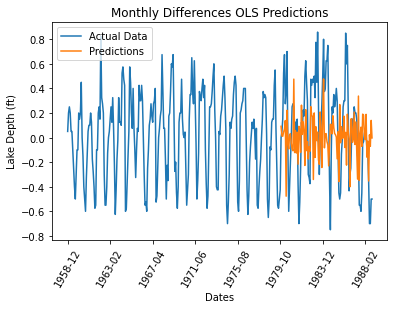

In [67]:
important_cols = list(model.params[1:].index)
predictions = model.predict(sm.add_constant(test[important_cols]))
filled_predictions = df.depth.copy()
filled_predictions[:-len(predictions)] = None
filled_predictions[-len(predictions):] = predictions

df.depth.plot(label="Actual Data", legend=True, title="Monthly Differences OLS Predictions", xlabel="Dates", ylabel="Lake Depth (ft)")
filled_predictions.plot(label="Predictions", legend=True, rot=60)


<AxesSubplot:title={'center':'Monthly Differences OLS Predictions'}, xlabel='Dates', ylabel='Lake Depth (ft)'>

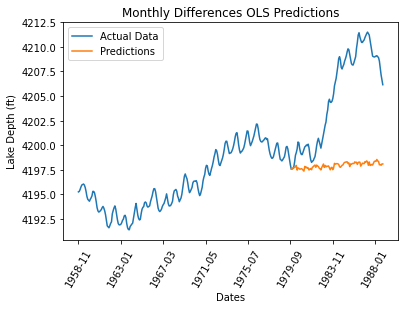

In [102]:
important_cols = list(model.params[1:].index)
diff_predictions = model.predict(sm.add_constant(test[important_cols]))

# Undifference data
predictions = original_df.depth[-len(diff_predictions)-1:].copy() # Keep last value of training set as initial value for test set
predictions[1:] = diff_predictions
predictions = predictions.cumsum()

# Plot
filled_predictions = original_df.depth.copy()
filled_predictions[:-len(predictions)] = None 
filled_predictions[-len(predictions):] = predictions

original_df.depth.plot(label="Actual Data", legend=True, title="Monthly Differences OLS Predictions", xlabel="Dates", ylabel="Lake Depth (ft)")
filled_predictions.plot(label="Predictions", legend=True, rot=60)

In [64]:
important_cols

['PRCP_USC00427255',
 'TMIN_USC00427576',
 'TMIN_USC00428114',
 'TMAX_USC00428114',
 'TMAX_USC00429133',
 'TMIN_USW00024126']